In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

['train.csv.zip', 'sample_submission.csv.zip', 'sampleSubmission.csv.zip', 'test.csv.zip']


In [2]:
import zipfile
train_zip = zipfile.ZipFile('../input/train.csv.zip')
test_zip = zipfile.ZipFile('../input/test.csv.zip')

train = pd.read_csv(train_zip.open('train.csv'))
test = pd.read_csv(test_zip.open('test.csv'))

# The following two lines determines the number of visible columns and 
#the number of visible rows for dataframes and that doesn't affect the code
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

Let's now see how many data points we have for training.

In [4]:
print("The number of traning examples(data points) = %i " % train.shape[0])
print("The number of features we have = %i " % train.shape[1])

The number of traning examples(data points) = 15120 
The number of features we have = 56 


In [5]:
train.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      135.091997                         1511.147288          0.237897   
std        45.895189                         1099.936493          0.425810   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          730.000000          0.000000   
50%       138.000000                         1256.000000          0.000000   
75%       167.000000                         1988.250000          0.000000   
max       248.000000                         6993.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000      15120.000000  15120.000000   
mean           0.033003          0.419907          0.309193      0.023479   
std            0.178649          0.493560          0.462176      0.151424   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      0.000000   
75%            0.000000          1.000000          1.000000      0.000000   
max            1.000000          1.000000          1.000000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041204      0.063624      0.055754      0.010913      0.042989   
std        0.198768      0.244091      0.229454      0.103896      0.202840   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000 

In [6]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


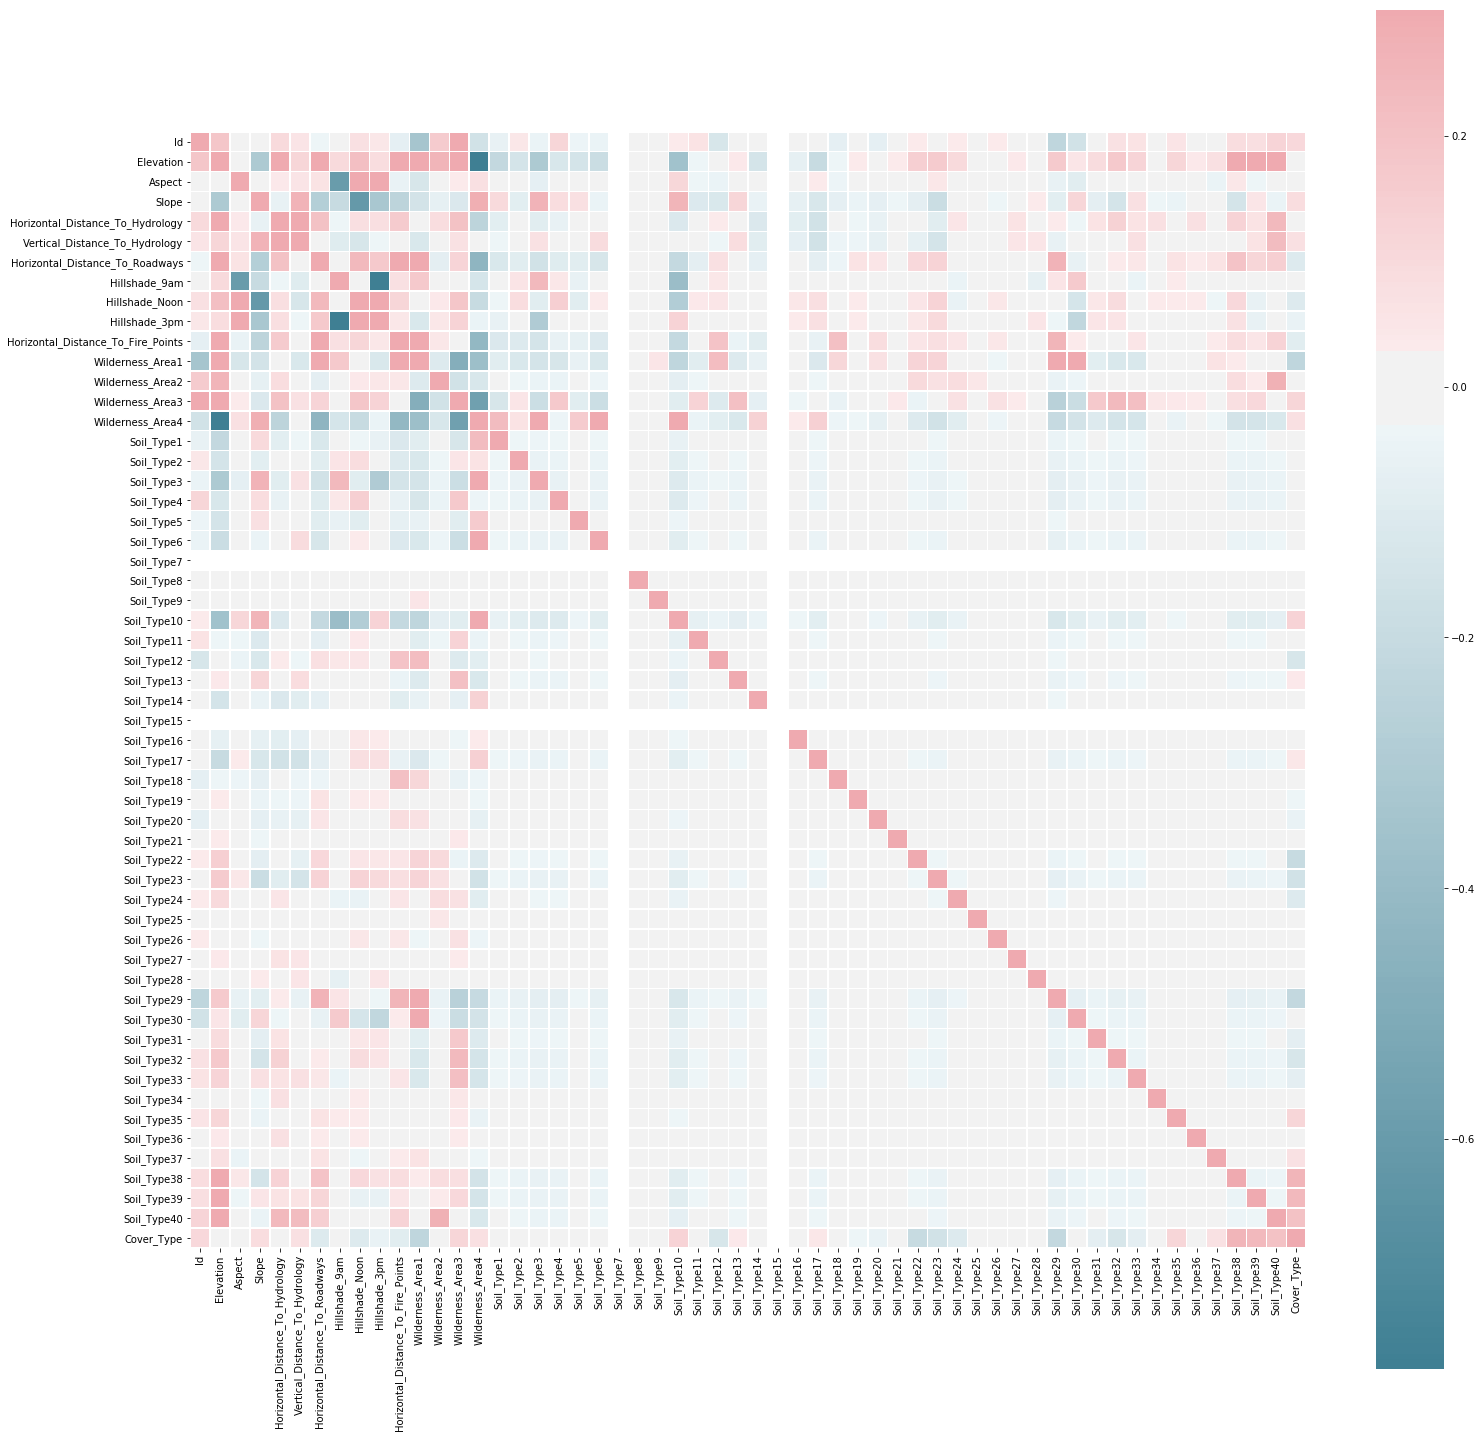

In [7]:
import seaborn as sns


import matplotlib.pyplot as plt


corr = train.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

In [9]:
corr

Id  Elevation    Aspect     Slope  \
Id                                  1.000000   0.185496  0.017702 -0.020168   
Elevation                           0.185496   1.000000 -0.011096 -0.312640   
Aspect                              0.017702  -0.011096  1.000000  0.028148   
Slope                              -0.020168  -0.312640  0.028148  1.000000   
Horizontal_Distance_To_Hydrology    0.099637   0.412712  0.040732 -0.055976   
Vertical_Distance_To_Hydrology      0.055348   0.122092  0.056412  0.265314   
Horizontal_Distance_To_Roadways    -0.033028   0.578659  0.066184 -0.277049   
Hillshade_9am                       0.000786   0.097900 -0.593997 -0.200072   
Hillshade_Noon                      0.073123   0.215782  0.324912 -0.612613   
Hillshade_3pm                       0.042524   0.089518  0.635022 -0.326887   
Horizontal_Distance_To_Fire_Points -0.068739   0.443563 -0.052169 -0.239527   
Wilderness_Area1                   -0.339861   0.330417 -0.131262 -0.152820   
Wilderness_Area2                    0.158484   0.261729  0.028238 -0.065923   
Wilderness_Area3                    0.384219   0.354025  0.032578 -0.113033   
Wilderness_Area4                   -0.158451  -0.783651  0.075228  0.286985   
Soil_Type1                         -0.058451  -0.218818 -0.024538  0.099355   
Soil_Type2                          0.045545  -0.147947 -0.020970 -0.081498   
Soil_Type3                         -0.045757  -0.307523 -0.069120  0.265541   
Soil_Type4                          0.118214  -0.125342  0.018019  0.087841   
Soil_Type5                         -0.041713  -0.141478  0.000343  0.074720   
Soil_Type6                         -0.046017  -0.187354 -0.006066 -0.047868   
Soil_Type7                               NaN        NaN       NaN       NaN   
Soil_Type8                         -0.013159   0.002934  0.001723 -0.012989   
Soil_Type9                         -0.014219  -0.010571 -0.019391 -0.022220   
Soil_Type10                         0.032292  -0.357816  0.111959  0.255804   
Soil_Type11                         0.063372  -0.037906 -0.034549 -0.109798   
Soil_Type12                        -0.129930   0.017432 -0.044142 -0.115088   
Soil_Type13                         0.015145   0.039304  0.024312  0.119863   
Soil_Type14                        -0.016034  -0.140619  0.001181 -0.054085   
Soil_Type15                              NaN        NaN       NaN       NaN   
Soil_Type16                        -0.003794  -0.066252  0.027121 -0.064321   
Soil_Type17                        -0.002940  -0.200663  0.029870 -0.124375   
Soil_Type18                        -0.070252  -0.035173 -0.042140 -0.069326   
Soil_Type19                        -0.029707   0.029808  0.007570 -0.047742   
Soil_Type20                        -0.069537   0.008548 -0.023330 -0.068508   
Soil_Type21                         0.014734   0.032509  0.018815 -0.033935   
Soil_Type22                         0.035739   0.146236  0.022301 -0.076393   
Soil_Type23                        -0.017422   0.159872  0.041880 -0.184528   
Soil_Type24                         0.034019   0.097647  0.005480  0.017982   
Soil_Type25                         0.005675   0.010586 -0.002340  0.011062   
Soil_Type26                         0.031176   0.020669 -0.009775 -0.030700   
Soil_Type27                         0.024141   0.040019  0.018986  0.012295   
Soil_Type28                        -0.005104  -0.001077  0.026330  0.036082   
Soil_Type29                        -0.231780   0.165304 -0.063428 -0.083108   
Soil_Type30                        -0.157515   0.048204 -0.086897  0.118725   
Soil_Type31                         0.025826   0.093191  0.008160 -0.076851   
Soil_Type32                         0.068048   0.172349  0.003700 -0.147258   
Soil_Type33                         0.066887   0.123821  0.018719  0.072027   
Soil_Type34                         0.022520   0.021876  0.012927 -0.030590   
Soil_Type35                         0.057480   0.120157 -0.004235 -0.048855   
Soil_Type36  

In [10]:
train.drop(['Id'], inplace = True, axis = 1 )
train.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )
test.drop(['Soil_Type15' , "Soil_Type7"], inplace = True, axis = 1 )

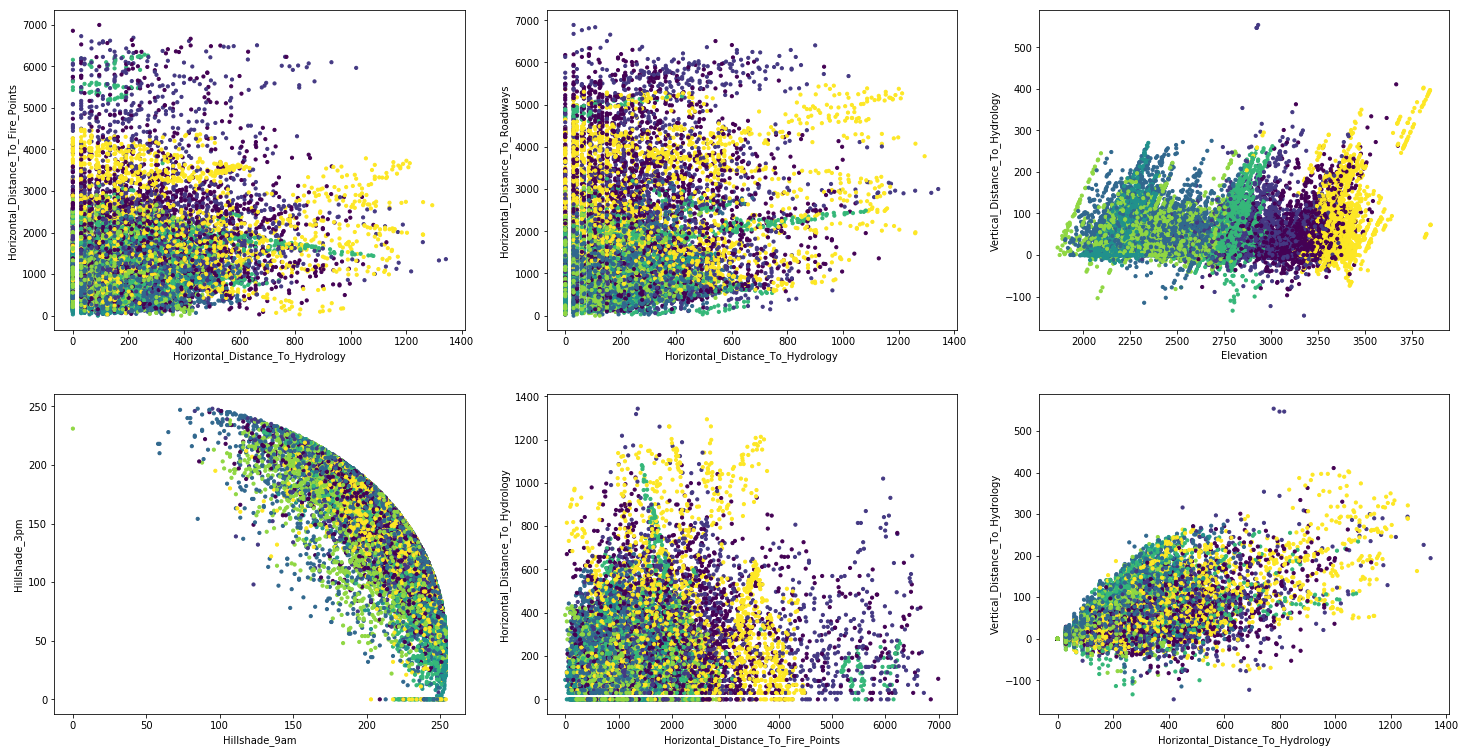

In [11]:
import matplotlib.pyplot as plt
classes = np.array(list(train.Cover_Type.values))

def plotRelation(first_feature, sec_feature):
    
    plt.scatter(first_feature, sec_feature, c = classes, s=10)
    plt.xlabel(first_feature.name)
    plt.ylabel(sec_feature.name)
    
f = plt.figure(figsize=(25,20))
f.add_subplot(331)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Fire_Points)
f.add_subplot(332)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Horizontal_Distance_To_Roadways)
f.add_subplot(333)
plotRelation(train.Elevation, train.Vertical_Distance_To_Hydrology)
f.add_subplot(334)
plotRelation(train.Hillshade_9am, train.Hillshade_3pm)
f.add_subplot(335)
plotRelation(train.Horizontal_Distance_To_Fire_Points, train.Horizontal_Distance_To_Hydrology)
f.add_subplot(336)
plotRelation(train.Horizontal_Distance_To_Hydrology, train.Vertical_Distance_To_Hydrology)

In [12]:
# train.head()
train['HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])
train['Neg_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])
train['HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])
train['HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])
train['Neg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])

train['Neg_Elevation_Vertical'] = train['Elevation']-train['Vertical_Distance_To_Hydrology']
train['Elevation_Vertical'] = train['Elevation']+train['Vertical_Distance_To_Hydrology']

train['mean_hillshade'] =  (train['Hillshade_9am']  + train['Hillshade_Noon'] + train['Hillshade_3pm'] ) / 3

train['Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Fire_Points'])/2
train['Mean_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])/2
train['Mean_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])/2

train['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Fire_Points'])/2
train['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])/2
train['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])/2

train['Slope2'] = np.sqrt(train['Horizontal_Distance_To_Hydrology']**2+train['Vertical_Distance_To_Hydrology']**2)
train['Mean_Fire_Hydrology_Roadways']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology'] + train['Horizontal_Distance_To_Roadways']) / 3
train['Mean_Fire_Hyd']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology']) / 2 

train["Vertical_Distance_To_Hydrology"] = abs(train['Vertical_Distance_To_Hydrology'])

train['Neg_EHyd'] = train.Elevation-train.Horizontal_Distance_To_Hydrology*0.2


test['HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])
test['Neg_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])
test['HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])
test['HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])
test['Neg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])

test['Neg_Elevation_Vertical'] = test['Elevation']-test['Vertical_Distance_To_Hydrology']
test['Elevation_Vertical'] = test['Elevation'] + test['Vertical_Distance_To_Hydrology']

test['mean_hillshade'] = (test['Hillshade_9am']  + test['Hillshade_Noon']  + test['Hillshade_3pm'] ) / 3

test['Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Fire_Points'])/2
test['Mean_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])/2
test['Mean_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])/2

test['MeanNeg_Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Fire_Points'])/2
test['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])/2
test['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])/2

test['Slope2'] = np.sqrt(test['Horizontal_Distance_To_Hydrology']**2+test['Vertical_Distance_To_Hydrology']**2)
test['Mean_Fire_Hydrology_Roadways']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology'] + test['Horizontal_Distance_To_Roadways']) / 3 
test['Mean_Fire_Hyd']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology']) / 2


test['Vertical_Distance_To_Hydrology'] = abs(test["Vertical_Distance_To_Hydrology"])

test['Neg_EHyd'] = test.Elevation-test.Horizontal_Distance_To_Hydrology*0.2

In [13]:
train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                               6                              390   
2                              65                             3180   
3                             118                             3090   
4                               1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type8  Soil_Type9  Soil_Type10  \
0           0           0           0           0           0            0   
1           0           0           0           0           0            0   
2           0           0           0           0           0            0   
3           0           0           0           0           0            0   
4           0           0           0           0           0            0   

   Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type16  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            1            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  \
0            0            0            1            0            0   
1            0            0            1            0            0   
2            0  

In [14]:
from sklearn.model_selection import train_test_split
x = train.drop(['Cover_Type'], axis = 1)
y = train['Cover_Type']
print( y.head() )

x_train, x_test, y_train, y_test = train_test_split( x.values, y.values, test_size=0.05, random_state=42 )

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64


In [15]:
unique, count= np.unique(y_train, return_counts=True)
print("The number of occurances of each class in the dataset = %s " % dict (zip(unique, count) ), "\n" )

The number of occurances of each class in the dataset = {1: 2047, 2: 2057, 3: 2036, 4: 2071, 5: 2048, 6: 2061, 7: 2044}  



In [16]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit an Extra Trees model to the data
clf = ExtraTreesClassifier()
clf.fit(x_train,y_train)
# display the relative importance of each attribute
z = clf.feature_importances_
#make a dataframe to display every value and its column name
df = pd.DataFrame()
print(len(z))
print(len(list(x.columns.values)))

df["values"] = z
df['column'] = list(x.columns.values)
# Sort then descendingly to get the worst features at the end
df.sort_values(by='values', ascending=False, inplace = True)
df.head(100)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


71
71


values                                            column
58  0.090654                            Neg_Elevation_Vertical
70  0.074730                                          Neg_EHyd
0   0.063397                                         Elevation
59  0.049287                                Elevation_Vertical
22  0.028835                                       Soil_Type10
63  0.027449     Mean_HorizontalFire_Points_HorizontalRoadways
13  0.025760                                  Wilderness_Area4
62  0.024280       Mean_HorizontalHydrology_HorizontalRoadways
68  0.023524                      Mean_Fire_Hydrology_Roadways
55  0.023159        Neg_HorizontalHydrology_HorizontalRoadways
16  0.022284                                        Soil_Type3
5   0.021558                   Horizontal_Distance_To_Roadways
10  0.021374                                  Wilderness_Area1
67  0.021282                                            Slope2
65  0.020691    MeanNeg_HorizontalHydrology_HorizontalRoadways
56  0.020508          HorizontalFire_Points_HorizontalRoadways
53  0.020192            Neg_HorizontalHydrology_HorizontalFire
4   0.019917                    Vertical_Distance_To_Hydrology
6   0.019420                                     Hillshade_9am
3   0.019404                  Horizontal_Distance_To_Hydrology
52  0.018623                HorizontalHydrology_HorizontalFire
66  0.018125  MeanNeg_HorizontalFire_Points_HorizontalRoadways
1   0.018094                                            Aspect
49  0.017904                                       Soil_Type38
7   0.017608                                    Hillshade_Noon
9   0.017581                Horizontal_Distance_To_Fire_Points
57  0.017156      Neg_HorizontalFire_Points_HorizontalRoadways
8   0.017124                                     Hillshade_3pm
54  0.016915            HorizontalHydrology_HorizontalRoadways
64  0.016155   MeanNeg_Mean_HorizontalHydrology_HorizontalFire
69  0.015864                                     Mean_Fire_Hyd
61  0.015714           Mean_HorizontalHydrology_HorizontalFire
12  0.015085                                  Wilderness_Area3
50  0.014510                                       Soil_Type39
41  0.013122                                       Soil_Type30
2   0.012575                                             Slope
60  0.012511                                    mean_hillshade
17  0.011931                                        Soil_Type4
28  0.006780                                       Soil_Type17
15  0.006317                                        Soil_Type2
34  0.005761                                       Soil_Type23
43  0.005709                                       Soil_Type32
25  0.005213                                       Soil_Type13
51  0.004894                                       Soil_Type40
40  0.004833                                       Soil_Type29
33  0.004827                                       Soil_Type22
24  0.004122                                       Soil_Type12
19  0.003892                                        Soil_Type6
44  0.003545                                       Soil_Type33
23  0.003232                                       Soil_Type11
11  0.002624                                  Wilderness_Area2
42  0.002428                                       Soil_Type31
35  0.002227                                       Soil_Type24
31  0.001563                                       Soil_Type20
14  0.001391                                        Soil_Type1
46  0.001263                                       Soil_Type35
18  0.001051                                        Soil_Type5
27  0.000884                                       Soil_Type16
26  0.000774                                       Soil_Type14
37  0.000680                                       Soil_Type26
29  0.000422                                       Soil_Type18
48  0.000330                                       Soil_Type37
30  0.000266                         

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

clf = ExtraTreesClassifier(n_estimators=950, random_state=0)

clf.fit(x_train, y_train)
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(x_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(x_test, y_test) * 100))

n_estimators = np.linspace(start = 600 , stop = 1000, num = 8, dtype= int )
n_estimators = [500, 550, 600, 650, 700, 750, 800 , 850, 900, 950]

param_grid = {'n_estimators': n_estimators}
grid = GridSearchCV(clf, param_grid =param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(x_test, y_test) * 100 ) )

Accuracy of classifier on training set: 100.00
Accuracy of classifier on test set: 92.72


/opt/conda/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(x_train, y_train) * 100))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(x_test, y_test) * 100))

In [ ]:
test.head()

id = test['Id']
test.drop(['Id'] , inplace = True , axis = 1)

test = scaler.transform(test)

In [ ]:
predictions = grid.best_estimator_.predict(test)
predictions = clf.predict(test)


In [ ]:
out = pd.DataFrame()
out['Id'] = id
out['Cover_Type'] = predictions
out.to_csv('my_submission.csv', index=False)
out.head(5)